## Conditional Probability Plots - Attempt 3
## Making these plots PDFs instead of histograms

**Do some conditional probability plots**
* for SW > 600 w/m2, 
    * what fraction of images in each 1 degree wide T bin unload vs stay
        * plotted as, T vs Prob_unload(T)
* for SW between 400-600 W/m2, repeat 

And then by wind <br>
Then say for all T<0, what probability unloads for each 100 W/m^2 wide solar bin? Etc. 

In [1]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

## Open met data and classifications
**Make them into a single df** 

In [2]:
# Open all met data 
for1 = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/for1c_hcass.csv")
for2 = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/for2c_hcass.csv")
for3 = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/for3c_hcass.csv")
for4 = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/for4c_hcass.csv")
opn  = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/opnc_hcass.csv")

# Need datetime column
for1['datetime'] = pd.to_datetime(for1['datetime'])
for2['datetime'] = pd.to_datetime(for2['datetime'])
for3['datetime'] = pd.to_datetime(for3['datetime'])
for4['datetime'] = pd.to_datetime(for4['datetime'])
opn['datetime'] = pd.to_datetime(opn['datetime'])

# Open observations classifications 
obs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/Excel/Datetime/datetimeformat_ccg_classifications_only_cutdates_sunlightminus1.csv")
obs['datetime'] = pd.to_datetime(obs['datetime'])
obs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed

# Merge the two into 1 df 
for1df = pd.merge(for1, obs, how='outer', on='datetime')
for1df.index = pd.DatetimeIndex(for1df['datetime'])

for2df = pd.merge(for1, obs, how='outer', on='datetime')
for2df.index = pd.DatetimeIndex(for1df['datetime'])

for3df = pd.merge(for1, obs, how='outer', on='datetime')
for3df.index = pd.DatetimeIndex(for1df['datetime'])

opndf = pd.merge(opn, obs, how='outer', on='datetime')
opndf.index = pd.DatetimeIndex(opndf['datetime'])

**Add a symbol to the sunlit classifications**
- E and Eminus 1 

In [3]:
# Create symbols for sunlit or not 
opndf['Esymbol']=np.nan  
opndf['Eminus1symbol']=np.nan  

# open triangle for cloudy, diamond for sunny, open x circle for no radiation data
opndf['Esymbol'].mask(opndf['E'] == 0., 105, inplace=True) # this is working without fillna
opndf['Esymbol'].mask(opndf['E'] == 1., 2, inplace=True)  
opndf['Eminus1symbol'].mask(opndf['Eminus1'] == 0., 105, inplace=True) # this is working without fillna
opndf['Eminus1symbol'].mask(opndf['Eminus1'] == 1., 2, inplace=True)  

# then fillna with 128 for circle with x through it 
opndf['Esymbol'] = opndf['Esymbol'].fillna(128) 
opndf['Eminus1symbol'] = opndf['Eminus1symbol'].fillna(128) 

opndf.head()

## IF RADIATION_ANALSYSIS.IPYNB NOTEBOOK CHANGES THE SHAPES, YOU'LL WANT TO MAKE IT MATCH HERE TOO SO THE PLOTS HAVE THE SAME CONVENTION 
## ^^ THIS WAS TRUE, when I cared about pysolar compared to sunlit but if we don't use that, it doesn't matter and the shapes are only classified here 

datetime     SWR_Avg   LWRin_Avg  AirTC_Avg  \
datetime                                                                     
2021-02-13 12:00:00 2021-02-13 12:00:00  604.682917  188.964583  -8.376617   
2021-02-13 13:00:00 2021-02-13 13:00:00  554.419583  190.445417  -7.641083   
2021-02-13 14:00:00 2021-02-13 14:00:00  468.039167  191.897083  -8.342483   
2021-02-13 15:00:00 2021-02-13 15:00:00  356.765833  202.591667  -8.621583   
2021-02-13 16:00:00 2021-02-13 16:00:00   79.754583  187.632500 -10.212458   

                            RH  IRTemp_C_A  AirTC2_Avg    WindDir  WS_ms_Avg  \
datetime                                                                       
2021-02-13 12:00:00  71.224333   -6.834288   -8.540871  49.450000   2.645875   
2021-02-13 13:00:00  70.487708   -6.324933   -7.850617  53.912500   2.669346   
2021-02-13 14:00:00  77.139792   -7.237567   -8.369750  41.700000   3.364821   
2021-02-13 15:00:00  79.103375   -8.070804   -8.626625  52.441667   2.694854   
2021-02-13 16:00:00  85.675458  -15.041375  -10.153000  73.564854   1.706025   

                       A    B   CD    E  Eminus1  Esymbol  Eminus1symbol  
datetime                                                                  
2021-02-13 12:00:00  1.0  0.0  0.0  1.0      1.0      2.0            2.0  
2021-02-13 13:00:00  1.0  0.0  0.0  1.0      1.0      2.0            2.0  
2021-02-13 14:00:00  1.0  0.0  0.0  1.0      1.0      2.0            2.0  
2021-02-13 15:00:00  1.0  0.0  0.0  1.0      1.0      2.0            2.0  
2021-02-13 16:00:00  1.0  0.0  1.0  0.0      1.0    105.0            2.0

**Create seperate df for only snow in canopy timesteps**

In [4]:
for1df_unload = for1df.copy(deep=True)
for1df_unload = for1df_unload.dropna(axis=0, how='any', subset=['CD'])

for2df_unload = for2df.copy(deep=True)
for3df_unload = for2df_unload.dropna(axis=0, how='any', subset=['CD'])

for3df_unload = for3df.copy(deep=True)
for3df_unload = for3df_unload.dropna(axis=0, how='any', subset=['CD'])

opndf_unload = opndf.copy(deep=True)
opndf_unload = opndf_unload.dropna(axis=0, how='any', subset=['CD'])

In [10]:
# Have to remove all nans for this plotting to work.... need to come back to this 
opndf_unload.dropna(inplace=True) #########KEEP THIS IN MIND, COME BACK TO IT

opndf_unload['Classification'] = opndf_unload.CD.copy(deep=True)

opndf_unload.Classification.mask(opndf_unload.Classification == 0, "Snow Unloading", inplace=True)
opndf_unload.Classification.mask(opndf_unload.Classification == 1, "Snow Staying in the Canopy", inplace=True)

snowstaydf   = opndf_unload.where(opndf_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
snowunloaddf = opndf_unload.where(opndf_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

-------------------------

In [11]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 

# Grouped Colors
colors = [colorsnow, colorsnowunload] # my colors 

# Names
namesnow = 'Snow Staying'
namesnowunload = 'Snow Unloading'
group_labels = ['Snow Staying', 'Snow Unloading']

nametemp = "Air Temperature (C)"
nameSW = "Shortwave (W/m2)"
namewind = "Wind Speed (m/s)"

# Hist defaults
bintemp = [2,2]
binSW = [100,100]
binwind = [1,1]

In [8]:
def histpdf(x1, x2, binsize, kdeornorm, title, axistitle, showhist):
    # define data 
    hist_data = [x1, x2]

    # set plot constants 
    group_labels = ['Snow Staying', 'Snow Unloading']
    bin_sizes = binsize
    colors = [colorsnow, colorsnowunload] # my colors 

    # Create distplot 
    fig = ff.create_distplot(hist_data, group_labels, bin_size=bin_sizes, colors=colors, 
                             show_hist=showhist, show_rug=True,
                             curve_type=kdeornorm) # override deafult "kde" curve.. look inot this 

    fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
    fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')

    fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.2, layer="below", line_width=0)

    fig.update_layout(title=title, width=900, height=600, yaxis_title="probability density", xaxis_title=axistitle)

    fig.show()

# *Conditional Probability Analysis* - PDFs

**Do some conditional probability plots**
* for SW > 600 w/m2, 
    * what fraction of images in each 1 degree wide T bin unload vs stay
        * plotted as, T vs Prob_unload(T)
* for SW between 400-600 W/m2, repeat 

And then by wind <br>
Then say for all T<0, what probability unloads for each 100 W/m^2 wide solar bin? Etc. 

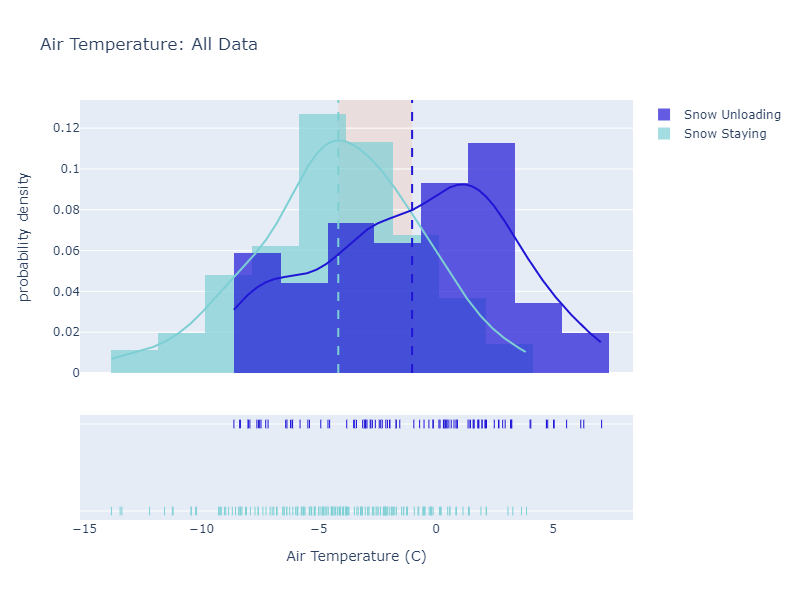

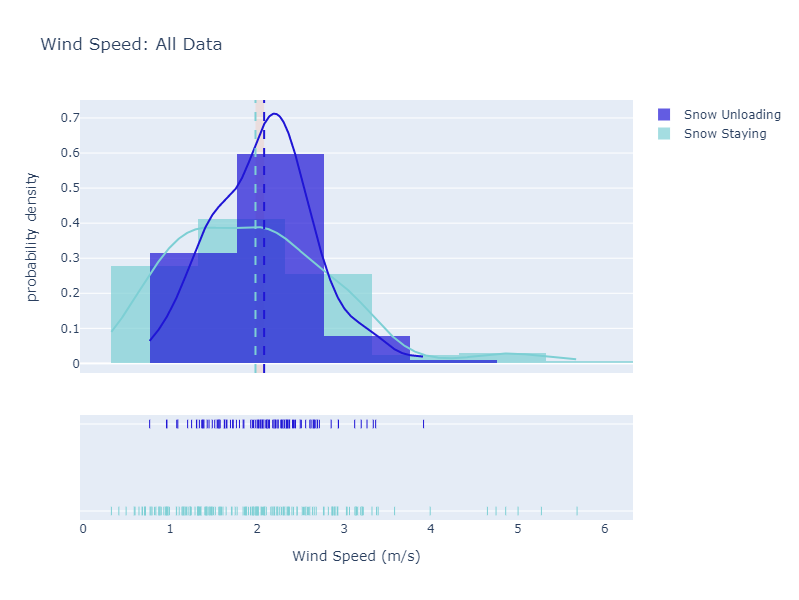

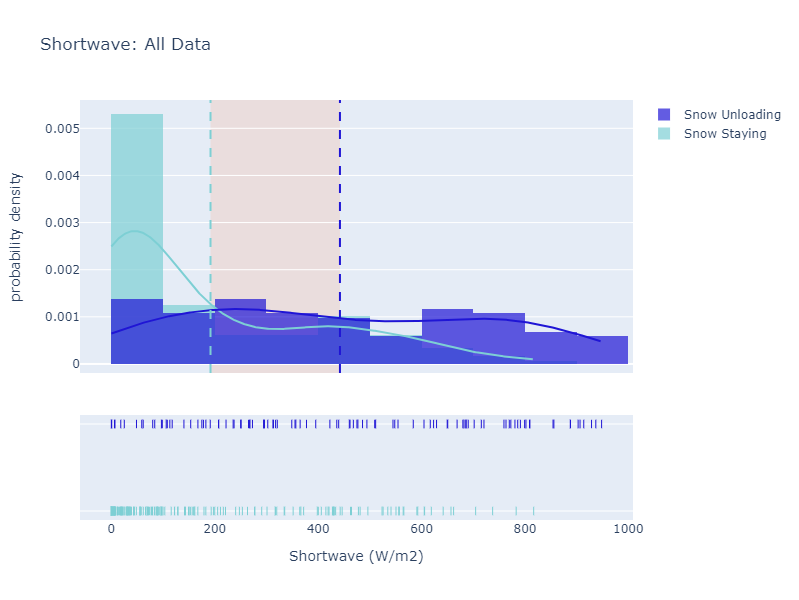

In [12]:
histpdf(snowstaydf.AirTC_Avg, snowunloaddf.AirTC_Avg, bintemp, 'kde', 'Air Temperature: All Data', nametemp, True)
histpdf(snowstaydf.WS_ms_Avg, snowunloaddf.WS_ms_Avg, binwind, 'kde', 'Wind Speed: All Data', namewind, True)
histpdf(snowstaydf.SWR_Avg, snowunloaddf.SWR_Avg, binSW, 'kde', 'Shortwave: All Data', nameSW, True)

## Creating new dataframes and classifying them based on categories 
Shortwave
- **dfSW600**: SW > 600
- **dfSW400600**: 400 < SW < 600
- **dfSW400**: SW < 400

Temperature
- **dfTg0**: T > 0 
- **dfTl0**: T < 0 

In [15]:
# Create copies of the df we want, and then going to classify it by SW threshold
dfSW600 =    opndf_unload.copy(deep=True) # SW > 600
dfSW400600 = opndf_unload.copy(deep=True) # SW between 400-600
dfSW400 =    opndf_unload.copy(deep=True) # SW < 400

# Create for temperature threshold 
dfTg0 =    opndf_unload.copy(deep=True) # Temp g(greater) 0
dfTl0 =    opndf_unload.copy(deep=True) # Temp l(less)    0 

# Creating df with only SW > 600
dfSW600.mask(dfSW600.SWR_Avg < 600, inplace=True) # we want where SW > 600, else nan
dfSW600.dropna(inplace=True) # and drop all nan... 
dfSW600stay   = dfSW600.where(dfSW600.CD == 1).dropna()
dfSW600unload = dfSW600.where(dfSW600.CD == 0).dropna()

# Creating df with onyl 400 < SW < 600
dfSW400600.mask(dfSW400600.SWR_Avg > 600, inplace=True) # we want where SW < 600, 
dfSW400600.mask(dfSW400600.SWR_Avg < 400, inplace=True) # and SW > 400, else nan
dfSW400600.dropna(inplace=True) # and drop all nan... 
dfSW400600stay   = dfSW400600.where(dfSW400600.CD == 1).dropna()
dfSW400600unload = dfSW400600.where(dfSW400600.CD == 0).dropna()

# Creating df with SW < 400
dfSW400.mask(dfSW400.SWR_Avg > 400, inplace=True) # we want where SW < 400, else nan
dfSW400.dropna(inplace=True) # and drop all nan...
dfSW400stay   = dfSW400.where(dfSW400.CD == 1).dropna()
dfSW400unload = dfSW400.where(dfSW400.CD == 0).dropna()

# Create df with T > 0 
dfTg0.mask(dfTg0.AirTC_Avg < 0, inplace=True) # we want where T > 0, else nan
dfTg0.dropna(inplace=True) 
dfTg0stay   = dfTg0.where(dfTg0.CD == 1).dropna()
dfTg0unload = dfTg0.where(dfTg0.CD == 0).dropna()

# Create df with T < 0 
dfTl0.mask(dfTl0.AirTC_Avg > 0, inplace=True) # we want where T < 0, else nan 
dfTl0.dropna(inplace=True)
dfTl0stay   = dfTl0.where(dfTl0.CD == 1).dropna()
dfTl0unload = dfTl0.where(dfTl0.CD == 0).dropna()

## Air Temperature by Classification
### SW thresholds

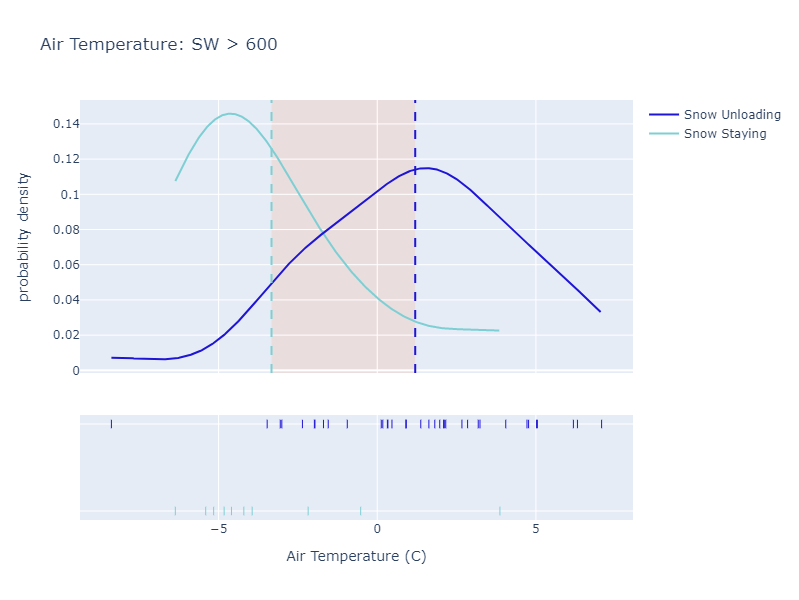

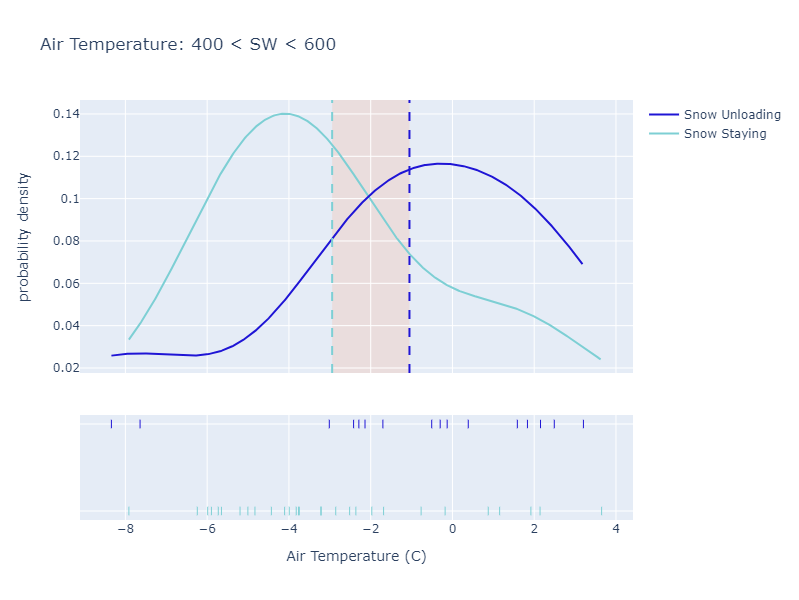

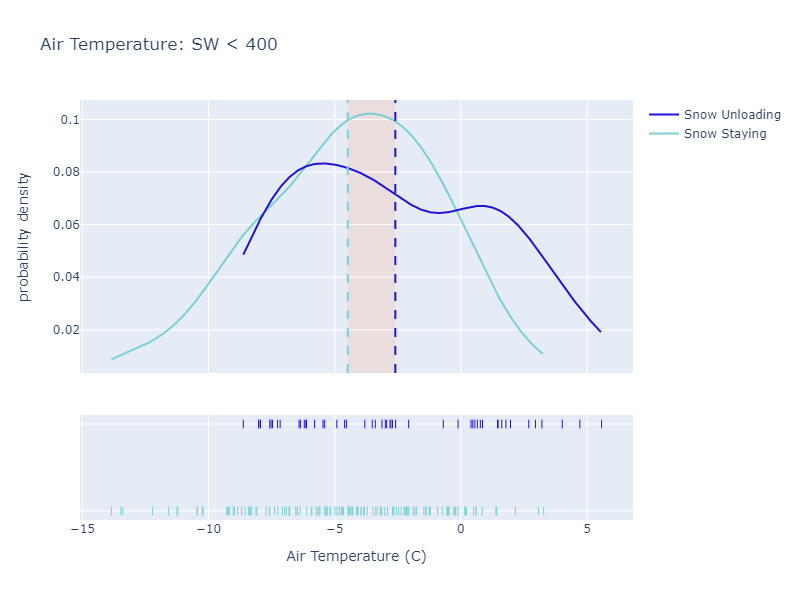

In [16]:
histpdf(dfSW600stay.AirTC_Avg, dfSW600unload.AirTC_Avg, [1,1], 'kde', 'Air Temperature: SW > 600', nametemp, False)
histpdf(dfSW400600stay.AirTC_Avg, dfSW400600unload.AirTC_Avg, [1,1], 'kde', 'Air Temperature: 400 < SW < 600', nametemp, False)
histpdf(dfSW400stay.AirTC_Avg, dfSW400unload.AirTC_Avg, [1,1], 'kde', 'Air Temperature: SW < 400', nametemp, False)

## Wind Speed by Classification, 
### SW threshold

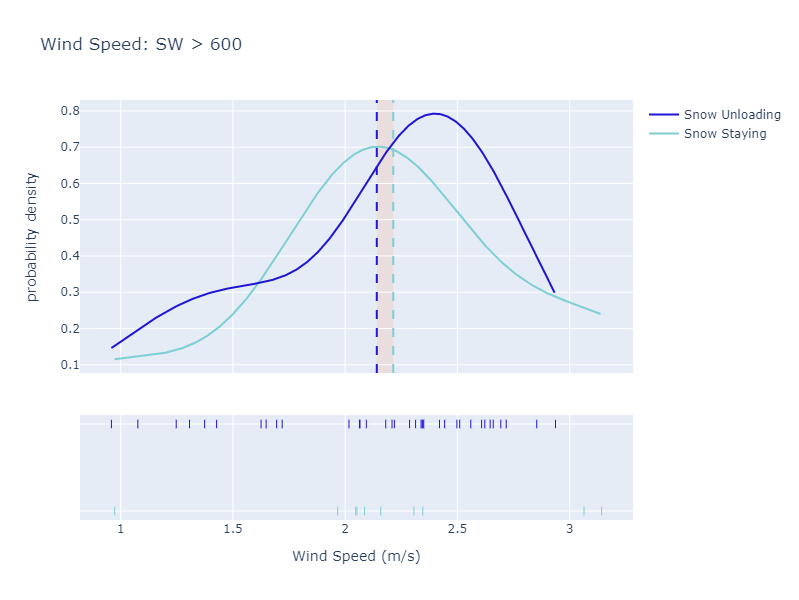

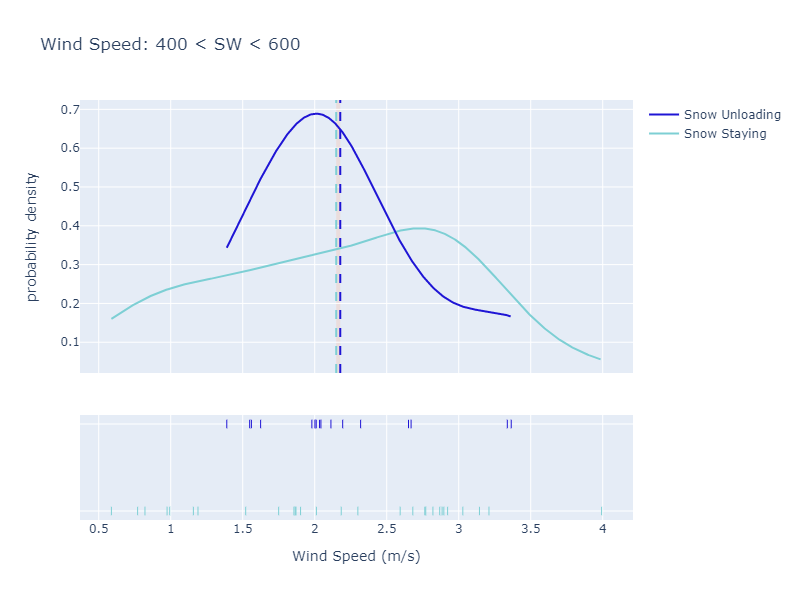

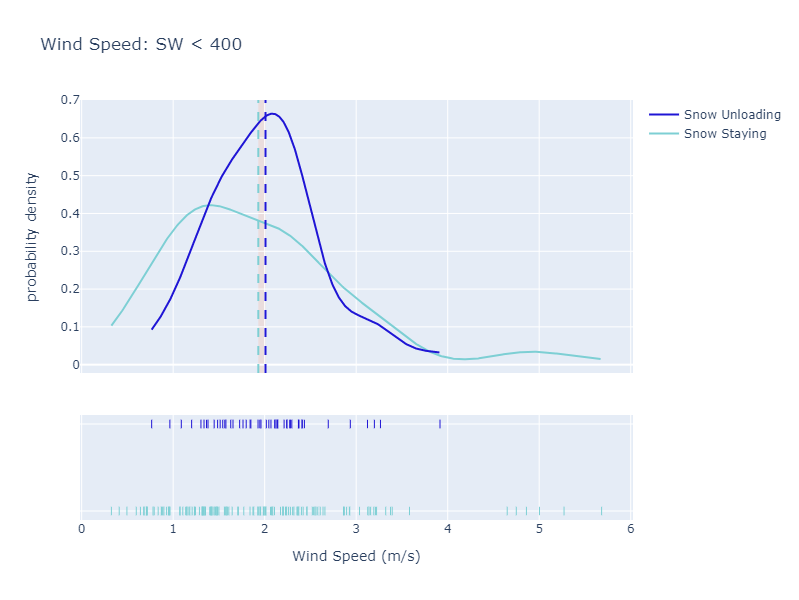

In [17]:
histpdf(dfSW600stay.WS_ms_Avg, dfSW600unload.WS_ms_Avg, [1,1], 'kde', 'Wind Speed: SW > 600', namewind, False)
histpdf(dfSW400600stay.WS_ms_Avg, dfSW400600unload.WS_ms_Avg, [1,1], 'kde', 'Wind Speed: 400 < SW < 600', namewind, False)
histpdf(dfSW400stay.WS_ms_Avg, dfSW400unload.WS_ms_Avg, [1,1], 'kde', 'Wind Speed: SW < 400', namewind, False)

## SW by Classification
### For air temperature threshold

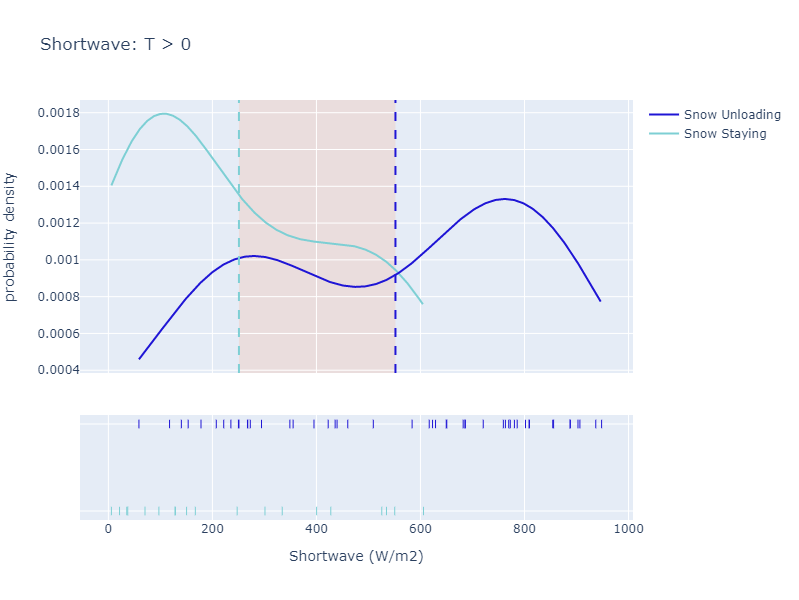

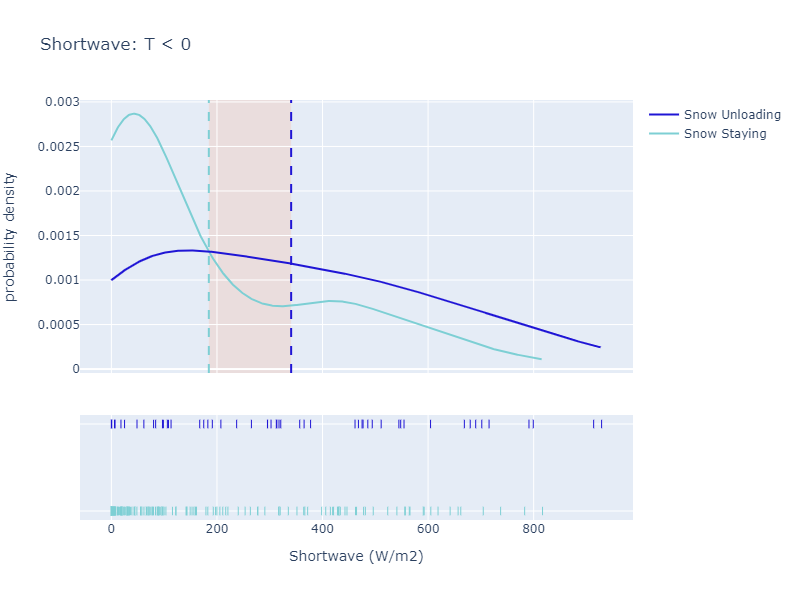

In [18]:
histpdf(dfTg0stay.SWR_Avg, dfTg0unload.SWR_Avg, [100,100], 'kde', 'Shortwave: T > 0', nameSW, False)
histpdf(dfTl0stay.SWR_Avg, dfTl0unload.SWR_Avg, [100,100], 'kde', 'Shortwave: T < 0', nameSW, False)

## Wind by Classification
### Air Temperature Threshold 

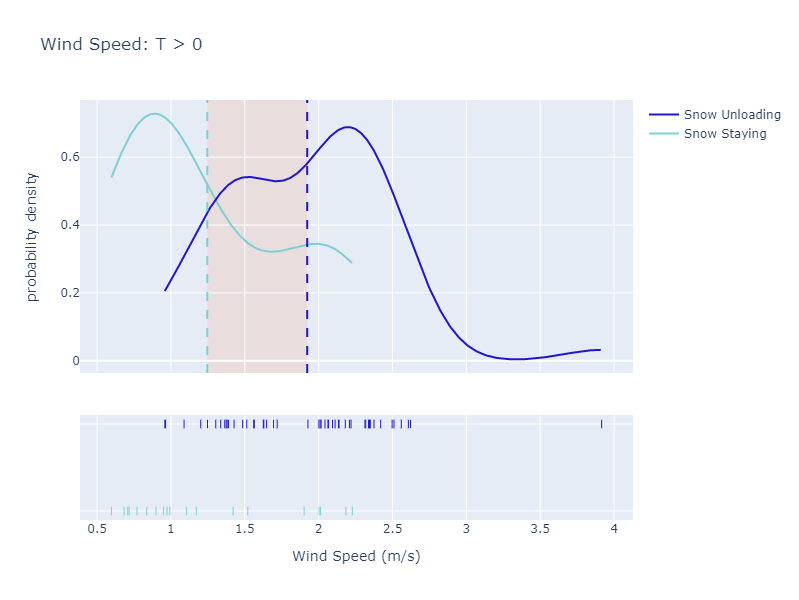

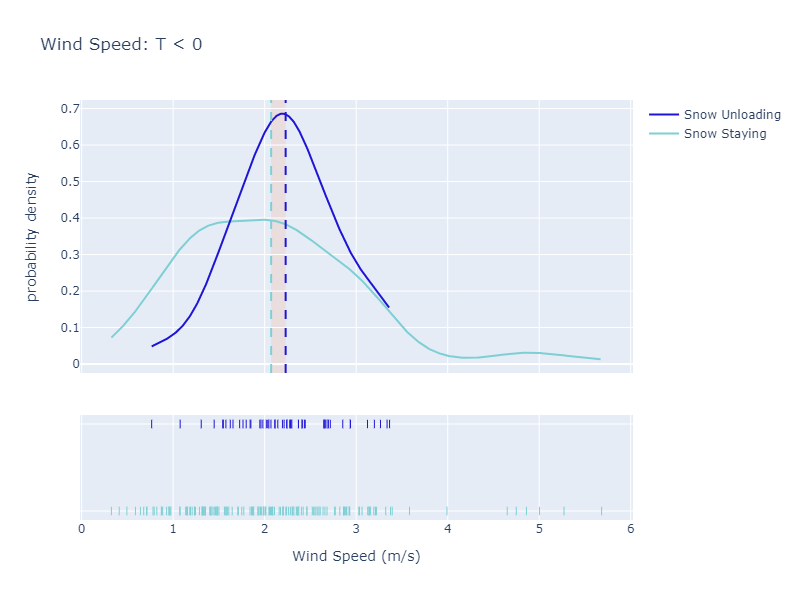

In [19]:
histpdf(dfTg0stay.WS_ms_Avg, dfTg0unload.WS_ms_Avg, [1,1], 'kde', 'Wind Speed: T > 0', namewind, False)
histpdf(dfTl0stay.WS_ms_Avg, dfTl0unload.WS_ms_Avg, [1,1], 'kde', 'Wind Speed: T < 0', namewind, False)